In [1]:
# Dark matplotlib magic to get nicer exports
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Common imports
import matplotlib.pyplot as plt
import numpy as np

# Fit function imports
from scipy.optimize import curve_fit
from scipy.stats import linregress
from numpy.linalg import lstsq
from numpy import polyfit 

# Linear data regression

In [2]:
x = np.arange(0, 10, 1)
m, b = 1.5, 10
y = m * x + b

# Add some randomess to the data
y += y * np.random.normal(0, 0.05, size=y.shape)

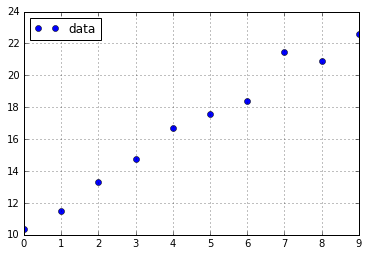

In [3]:
plt.figure()
plt.plot(x, y, 'o', label='data')
plt.grid()
plt.legend(loc='best')
plt.show()

1.38066921029 10.5314213224


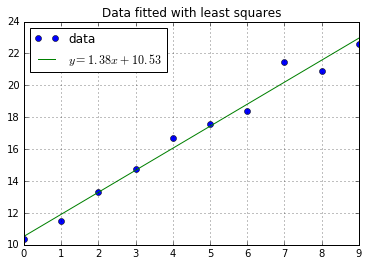

In [4]:
A = np.vstack([x, np.ones(len(x))]).T
m, b = lstsq(A, y)[0]
print(m, b)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, m * x + b,
         label=r'$y={m:.2f}x+{b:.2f}$'.format(m=m, b=b))
plt.title('Data fitted with least squares')
plt.legend(loc='best')
plt.grid(True)
plt.show()

[  1.38066921  10.53142132] [[ 0.00453791 -0.02042058]
 [-0.02042058  0.12933035]]


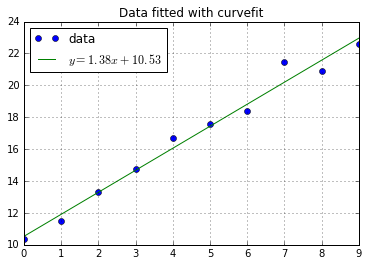

In [5]:
def line(x, m, b):
    return m * x + b

popt, pcov = curve_fit(line, x, y)
print(popt, pcov)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, m * x + b,
         label=r'$y={m:.2f}x+{b:.2f}$'.format(m=m, b=b))
plt.title('Data fitted with curvefit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

1.38066921029 10.5314213224 0.990611706831


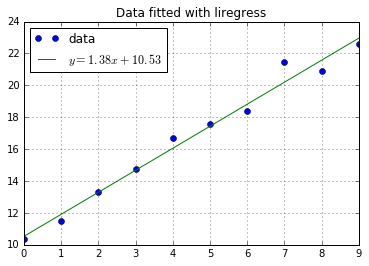

In [6]:
m, b, r_value, p_value, std_err = linregress(x, y)
print(m, b, r_value)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, m * x + b,
         label=r'$y={m:.2f}x+{b:.2f}$'.format(m=m, b=b))
plt.title('Data fitted with liregress')
plt.legend(loc='best')
plt.grid(True)
plt.show()

1.38066921029 10.5314213224


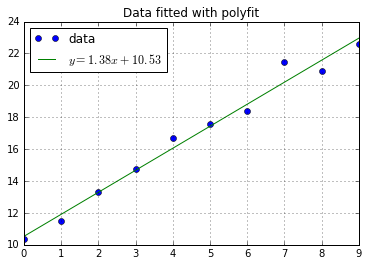

In [7]:
m, b = polyfit(x, y, 1)
print(m, b)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, m * x + b,
         label=r'$y={m:.2f}x+{b:.2f}$'.format(m=m, b=b))
plt.title('Data fitted with polyfit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# 2nd degree polynomial

In [8]:
x = np.linspace(-10, 10, 20)
a, b, c = 1.5, 2, -2
y = a * x ** 2 + b * x + c

# Add some randomess to the data
y += y * np.random.normal(0, 0.005, size=y.shape)

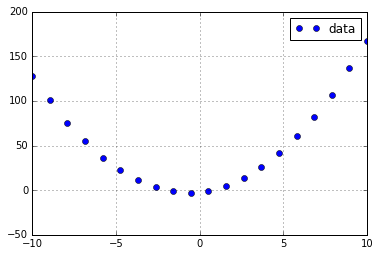

In [9]:
plt.figure()
plt.plot(x, y, 'o', label='data')
plt.grid()
plt.legend(loc='best')
plt.show()

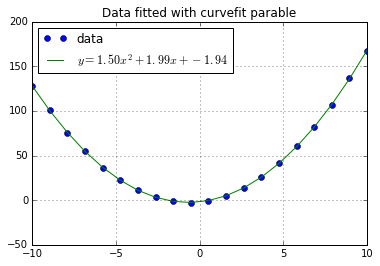

In [10]:
def parable(x, a, b, c):
    return a * x ** 2 + b * x + c

popt, pcov = curve_fit(parable, x, y)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, parable(x, *popt),
         label=r'$y={:.2f}x^2+{:.2f}x+{:.2f}$'.format(*popt))
plt.title('Data fitted with curvefit parable')
plt.legend(loc='best')
plt.grid(True)
plt.show()

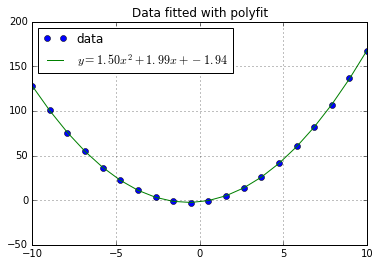

In [11]:
popt = polyfit(x, y, 2)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, parable(x, *popt),
         label=r'$y={:.2f}x^2+{:.2f}x+{:.2f}$'.format(*popt))
plt.title('Data fitted with polyfit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Linearize polinomial data

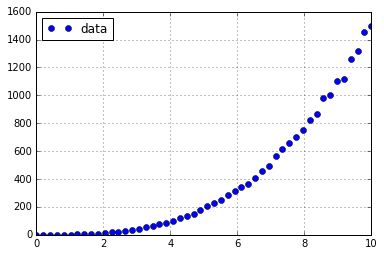

In [12]:
# Lets get some data we can linearize

x = np.linspace(0, 10)
y = 1.5 * x ** 3

# Add some serious randomess to the data
y += y * np.random.normal(0, 0.02, size=y.shape)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.grid()
plt.legend(loc='best')
plt.show()

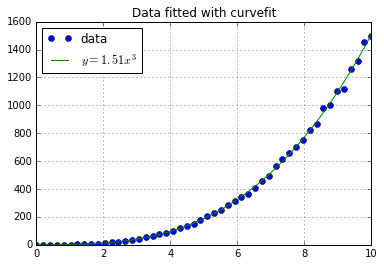

In [13]:
def objective(x, amplitude):
    return amplitude * x ** 3

popt, pcov = curve_fit(objective, x, y)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, objective(x, *popt),
         label=r'$y={:.2f}x^3$'.format(*popt))
plt.title('Data fitted with curvefit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [14]:
# Compute the error there
amplitude, = popt
error = np.abs(1.5 - amplitude) / 1.5
print('error: {:.3f}%'.format(error*100))

error: 0.397%


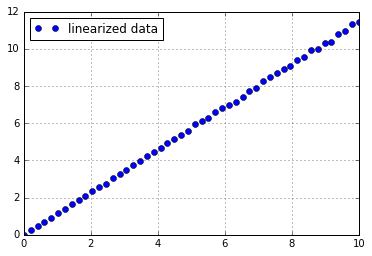

In [15]:
# Linearize
Y = y ** (1/3)

plt.figure()
plt.plot(x, Y, 'o', label='linearized data')
plt.grid()
plt.legend(loc='best')
plt.show()

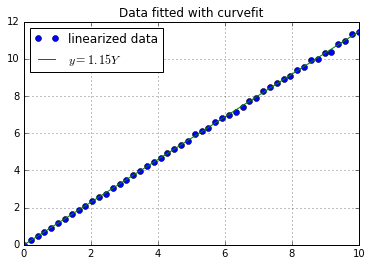

In [16]:
def linearized_objective(x, slope):
    return slope * x

popt, pcov = curve_fit(linearized_objective, x, Y)

plt.figure()
plt.plot(x, Y, 'o', label='linearized data')
plt.plot(x, linearized_objective(x, *popt),
         label=r'$y={:.2f}Y$'.format(*popt))
plt.title('Data fitted with curvefit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [17]:
# Regress the amplitude
qsq_amplitude, = popt
amplitude = qsq_amplitude ** 3

error = np.abs(1.5 - amplitude) / 1.5
print('error: {:.3f}%'.format(error*100))

error: 0.362%


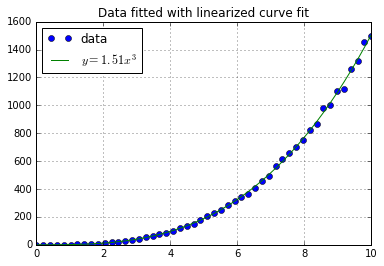

In [18]:
plt.figure()
plt.plot(x, y, 'o', label='data')
plt.plot(x, objective(x, amplitude),
         label=r'$y={:.2f}x^3$'.format(amplitude))
plt.title('Data fitted with linearized curve fit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Linearize exponential data

In [23]:
def error(name, value, expected):
    err = np.abs(value - expected) / expected
    print('Error in {}: {:.3f} ({:.3f}%)'.format(name, value, err * 100))

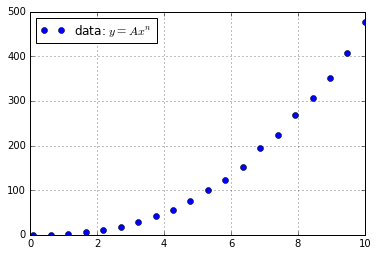

In [24]:
# Lets get some data we can linearize

x = np.linspace(0.1, 10, 20)
y = 1.5 * x ** 2.5

# Add some serious randomess to the data
y += y * np.random.normal(0, 0.02, size=y.shape)

plt.figure()
plt.plot(x, y, 'o', label=r'data: $y=Ax^n$')
plt.grid()
plt.legend(loc='best')
plt.show()

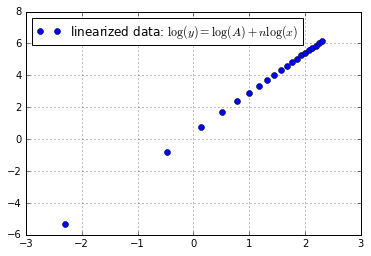

In [25]:
# Linearize with a log function
X = np.log(x)
Y = np.log(y)

plt.figure()
plt.plot(X, Y, 'o',
         label=r'linearized data: $\log(y) = \log(A)+n\log(x)$')
plt.grid()
plt.legend(loc='best')
plt.show()

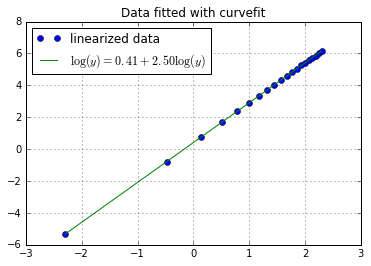

In [26]:
def objective(x, la, n):
    return la + n * x

popt, pcov = curve_fit(objective, X, Y)

plt.figure()
plt.plot(X, Y, 'o', label='linearized data')
plt.plot(X, objective(X, *popt),
         label=r'$\log(y) = {:.2f} + {:.2f}\log(y)$'.format(*popt))
plt.title('Data fitted with curvefit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [27]:
la, n = popt
A = np.exp(la)
print(A, n)
error('A', A, 1.5)
error('n', n, 2.5)

1.51011873016 2.49814914954
Error in A: 1.510 (0.675%)
Error in n: 2.498 (0.074%)


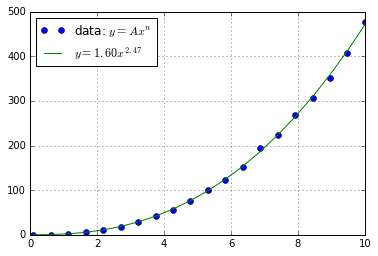

In [28]:
def objective(x, A, n):
    return A * x ** n

popt, pcov = curve_fit(objective, x, y)

plt.figure()
plt.plot(x, y, 'o', label=r'data: $y=Ax^n$')
plt.plot(x, objective(x, *popt), '-', label=r'$y={:.2f}x^{{{:.2f}}}$'.format(*popt))
plt.grid()
plt.legend(loc='best')
plt.show()

In [31]:
A, n = popt
error('A', A, 1.5)
error('n', n, 2.5)

Error in A: 1.602 (6.783%)
Error in n: 2.468 (1.282%)


# Multi peak fit

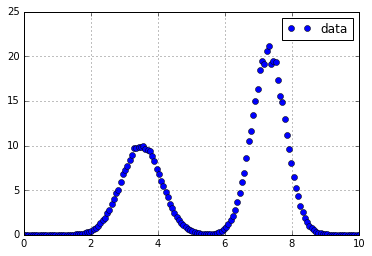

In [48]:
def gausian(x, amp, center, width):
    return amp * np.exp(- (x - center) ** 2 / (2 * width ** 2))

x = np.linspace(0, 10, 150)
y = gausian(x, 10, 3.5, 0.6) + gausian(x, 20.5, 7.3, 0.5)

# Add some serious randomess to the data
y += y * np.random.normal(0, 0.02, size=y.shape)

plt.figure()
plt.plot(x, y, 'o', label='data')
plt.grid()
plt.legend(loc='best')
plt.show()

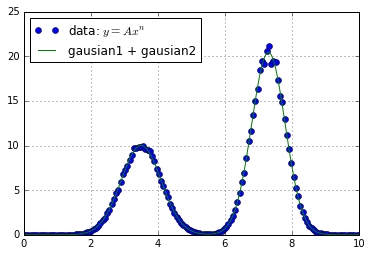

In [54]:
def objective(x, a1, b1, c1, a2, b2, c2):
    return gausian(x, a1, b1, c1) + gausian(x, a2, b2, c2)

popt, pcov = curve_fit(objective, x, y, p0=(10, 3, 1, 20, 7, 1), method='dogbox')

plt.figure()
plt.plot(x, y, 'o', label=r'data: $y=Ax^n$')
plt.plot(x, objective(x, *popt), '-', label=r'gausian1 + gausian2')
plt.grid()
plt.legend(loc='best')
plt.show()

In [58]:
print('amplitude: {:.3f} center: {:.3f}, width: {:.3f}'.format(*popt[:3]))
print('amplitude: {:.3f} center: {:.3f}, width: {:.3f}'.format(*popt[3:]))

amplitude: 10.017 center: 3.501, width: 0.599
amplitude: 20.460 center: 7.302, width: 0.500


# Read data from files

In [60]:
# first let's save some
np.savetxt('data.csv', np.array((x, y)).T)

Data usually looks like this:

```
0.000000000000000000e+00 3.996281044860736587e-07
6.711409395973154390e-02 7.919969140044814663e-07
1.342281879194630878e-01 1.482432716913762282e-06
2.013422818791946178e-01 2.667568870744123137e-06
2.684563758389261756e-01 4.993968209471594214e-06
3.355704697986577334e-01 8.946918995863483413e-06
4.026845637583892357e-01 1.685156684335011582e-05
4.697986577181207934e-01 2.835305134069740092e-05
5.369127516778523512e-01 4.933868222085689519e-05
6.040268456375839090e-01 9.019816912489286170e-05
6.711409395973154668e-01 1.491238364637662820e-04
7.382550335570470246e-01 2.427987914004493125e-04
8.053691275167784713e-01 4.263012316673300914e-04
8.724832214765100291e-01 6.808430267847871567e-04
9.395973154362415869e-01 1.132725403790512102e-03
1.006711409395973256e+00 1.796080625488268847e-03
1.073825503355704702e+00 2.844658638804914690e-03
...
```

In [61]:
# lets read it
x, y = np.loadtxt('data.csv', usecols=(0, 1), unpack=True)

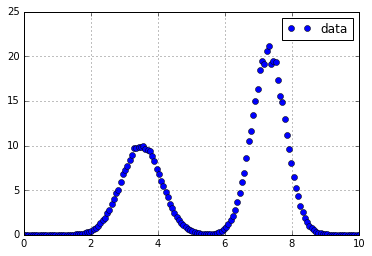

In [62]:
plt.figure()
plt.plot(x, y, 'o', label='data')
plt.grid()
plt.legend(loc='best')
plt.show()

In [63]:
# And our life goes on